In [1]:
import pandas as pd
import re

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Stanford NLP/step2-responses.csv')
df

,Task,direct_response_gpt,cot_response_gpt,few_shot_gpt,direct_response_gemini,cot_response_gemini,few_shot_gemini
0,Write a Python function using TensorFlow to cr...,```python\nimport tensorflow as tf\nfrom sklea...,To create a simple linear regression model wit...,"Sure, I'll guide you through creating and comp...",```python\nimport tensorflow as tf\nimport num...,"Okay, let's create a Python function using Ten...","Okay, here is the Python function using Tensor..."
1,Write a Python script using PyTorch to train a...,```python\nimport torch\nimport torch.nn as nn...,Certainly! Training a convolutional neural net...,Below is a complete Python script using PyTorc...,```python\nimport torch\nimport torch.nn as nn...,"Okay, let's build a Python script using PyTorc...","Okay, here is a complete Python script using P..."
2,Create a scikit-learn pipeline that generates ...,```python\nfrom sklearn.datasets import make_c...,Certainly! Let's break down the task and under...,To create a complete pipeline that includes da...,```python\nimport numpy as np\nfrom sklearn.da...,"Okay, let's build this scikit-learn pipeline s...","Okay, here is the scikit-learn code to generat..."
3,Write a Python function that uses Hugging Face...,```python\nfrom datasets import load_dataset\n...,To train a `distilbert-base-uncased` model usi...,To train a binary classification model using t...,```python\nimport torch\nfrom datasets import ...,"Okay, let's create a Python function using Hug...","Okay, here is the Python function `train_tense..."
4,Build a TensorFlow model for image classificat...,```python\nimport tensorflow as tf\nfrom tenso...,To build an image classification model using t...,To build an image classification model using t...,```python\nimport tensorflow as tf\nfrom tenso...,"Okay, let's build a TensorFlow model for Fashi...","Okay, here is the TensorFlow code to build an ..."
5,Write a PyTorch class that subclasses torch.ut...,```python\nimport os\nfrom PIL import Image\nf...,To create a custom PyTorch dataset class for l...,To create a custom `Dataset` class in PyTorch ...,```python\nimport torch\nimport os\nfrom PIL i...,"Okay, let's create a PyTorch `Dataset` subclas...","Okay, you've provided examples of a custom dat..."
6,Write a Python script that loads the Iris data...,```python\nfrom sklearn.datasets import load_i...,Certainly! I'll guide you step-by-step through...,Certainly! Here's a Python script that loads t...,```python\nfrom sklearn.datasets import load_i...,"Okay, let's write a Python script using scikit...",```python\nimport numpy as np\nimport matplotl...
7,Write a Java program using the Hadoop MapReduc...,```java\nimport java.io.IOException;\nimport j...,To write a Java program using the Hadoop MapRe...,Below is the Java program using the Hadoop Map...,```java\nimport java.io.IOException;\nimport j...,"Okay, let's break down how to write a Word Cou...","Okay, here is the Java program using the Hadoo..."


In [9]:
def extract_python_code(text):
    code_blocks = re.findall(r"```(?:python)?(.*?)```", text, re.DOTALL)
    code_blocks = [code.strip() for code in code_blocks]
    return code_blocks

In [25]:
extract_python_code(df['few_shot_gpt'][7])[0]

'java\nimport java.io.IOException;\nimport java.util.StringTokenizer;\n\nimport org.apache.hadoop.conf.Configuration;\nimport org.apache.hadoop.fs.Path;\nimport org.apache.hadoop.io.IntWritable;\nimport org.apache.hadoop.io.Text;\nimport org.apache.hadoop.mapreduce.Job;\nimport org.apache.hadoop.mapreduce.Mapper;\nimport org.apache.hadoop.mapreduce.Reducer;\nimport org.apache.hadoop.mapreduce.lib.input.FileInputFormat;\nimport org.apache.hadoop.mapreduce.lib.output.FileOutputFormat;\n\npublic class WordCount {\n\n    public static class TokenizerMapper extends Mapper<Object, Text, Text, IntWritable> {\n        \n        private final static IntWritable one = new IntWritable(1);\n        private Text word = new Text();\n\n        public void map(Object key, Text value, Context context) throws IOException, InterruptedException {\n            StringTokenizer itr = new StringTokenizer(value.toString());\n            while (itr.hasMoreTokens()) {\n                word.set(itr.nextToken());\

In [28]:
len(extract_python_code(df['few_shot_gpt'][2]))

1

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


def create_and_train_linear_model():
    # Fetch California housing dataset
    cali_housing = fetch_california_housing()

    # Convert to Pandas DataFrame
    data = pd.DataFrame(
        cali_housing.data, columns=cali_housing.feature_names)
    labels = pd.DataFrame(cali_housing.target, columns=["MedHouseVal"])

    # Feature selection
    feature = 'AveRooms'  # We will perform linear regression with respect to AveRooms

    # Split the data: 80% train, 20% test
    train_features, test_features, train_labels, test_labels = train_test_split(
        data[[feature]], labels, test_size=0.2, random_state=42)

    # Normalization layer
    normalizer = layers.Normalization(input_shape=[1,], axis=None)
    normalizer.adapt(np.array(train_features))

    # Create the sequential model
    model = tf.keras.Sequential([
        normalizer,
        layers.Dense(units=1)
    ])

    model.summary()

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                  loss='mean_absolute_error')

    # Train the model
    history = model.fit(
        train_features,
        train_labels,
        epochs=1,
        verbose=0,
        validation_split=0.2
    )

    # Evaluate the model
    loss = model.evaluate(test_features, test_labels, verbose=2)
    print(f"Test set Mean Absolute Error: {loss}")

# Call the function
create_and_train_linear_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

129/129 - 0s - 1ms/step - loss: 0.8740
Test set Mean Absolute Error: 0.8739990592002869


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import torch.nn.functional as F
from tqdm import tqdm

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
num_epochs = 1
batch_size = 100
learning_rate = 0.001

# Define a simple CNN
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(32 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Data transformation and dataset loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Initialize the network
model = ConvNet().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the network
def train():
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Evaluating the network
def evaluate():
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print(f'Accuracy: {100 * correct / total:.2f}%')

if __name__ == "__main__":
    print("Starting training...")
    train()
    print("Evaluating model...")
    evaluate()

100%|██████████| 170M/170M [00:10<00:00, 15.8MB/s]


Starting training...


Epoch 1/1: 100%|██████████| 500/500 [00:53<00:00,  9.30it/s]

Epoch [1/1], Loss: 1.4524
Evaluating model...


Accuracy: 58.42%


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Step 1: Generate a random n-class classification problem
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, n_classes=3, random_state=42)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a scikit-learn pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
    ('classifier', LogisticRegression(max_iter=1000))  # Logistic regression for multi-class classification
])

# Step 4: Train the model using the training data
pipeline.fit(X_train, y_train)

# Step 5: Predict the classes of the test set
y_pred = pipeline.predict(X_test)

# Step 6: Compute the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

Accuracy on the test set: 0.66


In [18]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset, load_metric
import numpy as np

def preprocess_function(examples):
    # Tokenize the input
    return tokenizer(examples["text"], padding="max_length", truncation=True)

def compute_metrics(p):
    # Compute accuracy
    labels = p.label_ids
    preds = np.argmax(p.predictions, axis=1)
    return metric.compute(predictions=preds, references=labels)

def train_model():
    # Load IMDb dataset
    dataset = load_dataset("imdb")

    # Split into train and test dataset
    train_dataset = dataset["train"]
    test_dataset = dataset["test"]

    # Load DistilBERT tokenizer
    tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

    # Preprocess data
    tokenized_train_dataset = train_dataset.map(preprocess_function, batched=True)
    tokenized_test_dataset = test_dataset.map(preprocess_function, batched=True)

    # Load metric
    metric = load_metric("accuracy")

    # Model initialization
    model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

    # Specify training arguments
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",
        learning_rate=2e-5,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=64,
        num_train_epochs=1,
        weight_decay=0.01,
    )

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_dataset,
        eval_dataset=tokenized_test_dataset,
        compute_metrics=compute_metrics,
    )

    # Train the model
    trainer.train()

# Execute the function to train the model
train_model()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


ValueError: Invalid pattern: '**' can only be an entire path component

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7207 - loss: 0.7659

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.7208 - loss: 0.7657 - val_accuracy: 0.8635 - val_loss: 0.3713
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8660 - loss: 0.3753
Test accuracy: 0.8635


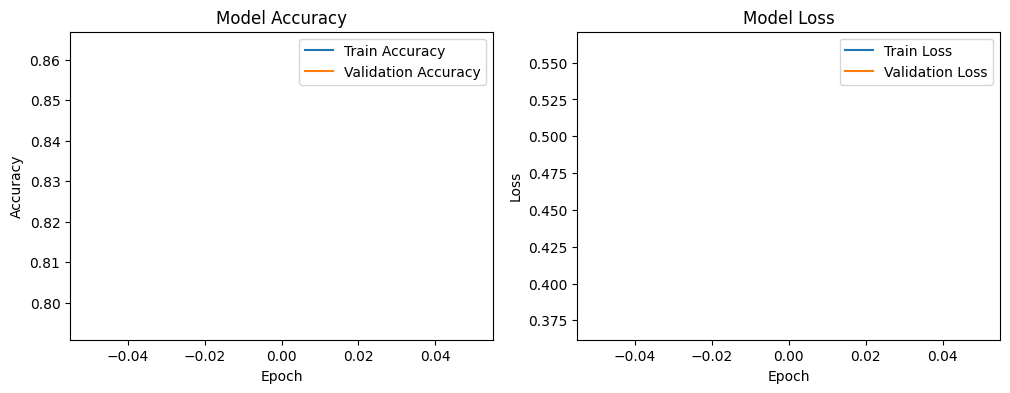

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# Load the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data: scale images to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Setup callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=1,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [22]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from torchvision import transforms
from torchvision.datasets import FashionMNIST
import random

# Define a transformation for the FashionMNIST dataset (if needed)
transform = transforms.Compose([
    transforms.ToTensor(),
    # Add additional transformations, e.g., normalization, if needed
])

# Custom Dataset class
class FashionMNISTDataset(Dataset):
    def __init__(self, img_dir, annotations_file, transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        return image, label

# Example usage:
# Assume you have the FashionMNIST dataset downloaded somewhere
def create_fashion_mnist_dataset():
    # This is just an example to simulate: normally, you'd have a path to your dataset
    # You can use torchvision to download FashionMNIST and subsequently use it in practice

    # Create a temporary dataset with random filenames and labels
    img_dir = 'path_to_images'
    annotations_file = 'path_to_annotations.csv'

    fashion_mnist_data = FashionMNIST(root='./data', train=True, download=True)
    os.makedirs(img_dir, exist_ok=True)
    annotations = []

    for idx in range(len(fashion_mnist_data)):
        image, label = fashion_mnist_data[idx]
        image_filename = f'image_{idx}.png'
        image.save(os.path.join(img_dir, image_filename))  # Save images locally
        annotations.append([image_filename, label])

    # Save annotations to a CSV file
    annotations_df = pd.DataFrame(annotations, columns=['filename', 'label'])
    annotations_df.to_csv(annotations_file, index=False)

    return img_dir, annotations_file

# Setup your train dataset
img_dir, annotations_file = create_fashion_mnist_dataset()

# Instantiate the dataset
dataset = FashionMNISTDataset(img_dir=img_dir, annotations_file=annotations_file, transform=transform)

# Create DataLoader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=2)

# Iterate through the dataloader
for images, labels in dataloader:
    print(images.size(), labels.size())
    # process the batch

100%|██████████| 26.4M/26.4M [00:03<00:00, 8.66MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 137kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.64MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.4MB/s]


TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "<ipython-input-22-ed0cd78c185e>", line 31, in __getitem__
    image = self.transform(image)
            ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torchvision/transforms/transforms.py", line 95, in __call__
    img = t(img)
          ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torchvision/transforms/transforms.py", line 137, in __call__
    return F.to_tensor(pic)
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torchvision/transforms/functional.py", line 142, in to_tensor
    raise TypeError(f"pic should be PIL Image or ndarray. Got {type(pic)}")
TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45

Accuracy: 88.89%


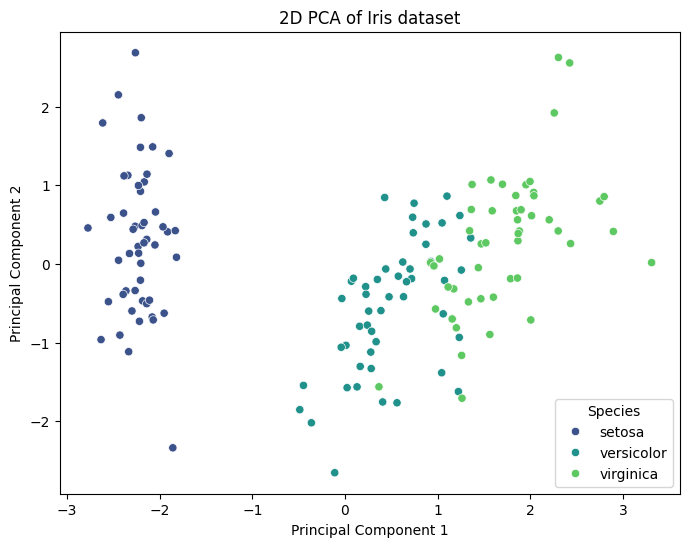

In [24]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimension to 2 with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Create and fit KNN classifier
n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)

# Predict and evaluate the classifier
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print out the classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Visualize the PCA-reduced data and decision boundaries
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=iris.target_names[y], palette='viridis', legend='full')
handles, _ = plt.gca().get_legend_handles_labels()
plt.title("2D PCA of Iris dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(handles, iris.target_names, title='Species')
plt.show()

In [ ]:
java
import java.io.IOException;
import java.util.StringTokenizer;

import org.apache.hadoop.conf.Configuration;
import org.apache.hadoop.fs.Path;
import org.apache.hadoop.io.IntWritable;
import org.apache.hadoop.io.Text;
import org.apache.hadoop.mapreduce.Job;
import org.apache.hadoop.mapreduce.Mapper;
import org.apache.hadoop.mapreduce.Reducer;
import org.apache.hadoop.mapreduce.lib.input.FileInputFormat;
import org.apache.hadoop.mapreduce.lib.output.FileOutputFormat;

public class WordCount {

    public static class TokenizerMapper extends Mapper<Object, Text, Text, IntWritable> {

        private final static IntWritable one = new IntWritable(1);
        private Text word = new Text();

        public void map(Object key, Text value, Context context) throws IOException, InterruptedException {
            StringTokenizer itr = new StringTokenizer(value.toString());
            while (itr.hasMoreTokens()) {
                word.set(itr.nextToken());
                context.write(word, one);
            }
        }
    }

    public static class IntSumReducer extends Reducer<Text, IntWritable, Text, IntWritable> {

        private IntWritable result = new IntWritable();

        public void reduce(Text key, Iterable<IntWritable> values, Context context)
                throws IOException, InterruptedException {
            int sum = 0;
            for (IntWritable val : values) {
                sum += val.get();
            }
            result.set(sum);
            context.write(key, result);
        }
    }

    public static void main(String[] args) throws Exception {
        Configuration conf = new Configuration();
        Job job = Job.getInstance(conf, "word count");
        job.setJarByClass(WordCount.class);
        job.setMapperClass(TokenizerMapper.class);
        job.setCombinerClass(IntSumReducer.class);
        job.setReducerClass(IntSumReducer.class);
        job.setOutputKeyClass(Text.class);
        job.setOutputValueClass(IntWritable.class);
        FileInputFormat.addInputPath(job, new Path(args[0]));
        FileOutputFormat.setOutputPath(job, new Path(args[1]));
        System.exit(job.waitForCompletion(true) ? 0 : 1);
    }
}